In [16]:
import pandas as pd

x_train = pd.read_csv("../data/processed/X_train_pictures.csv")
y_train = pd.read_csv("../data/processed/Y_train_pictures.csv")
df = pd.concat([x_train, y_train], axis=1)

In [1]:

import tensorflow as tf
print(tf.__version__)
tf.keras.backend.clear_session()

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2025-03-12 21:52:41.730657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741812761.905422    1292 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741812761.956824    1292 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 21:52:42.381343: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.18.0
Num GPUs Available:  1


In [2]:
from PIL import Image
import os
from tqdm import tqdm 

# Définir les chemins
src = "/mnt/c/Users/karim/rakuten/images/data_clean/image_train"
dest = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/train"

for index, row in tqdm(df.iterrows(), desc="Copie des images", unit="fichier"):
    filepath = os.path.join(src, row["filename"])
    dest_dir =  os.path.join(dest, str(row["prdtypecode"]))
    os.makedirs(dest_dir, exist_ok=True)
    dest_path = os.path.join(dest_dir,row["filename"])
    
    img = Image.open(filepath)
    img.save(dest_path)


NameError: name 'df' is not defined

In [6]:
# Importations pour la construiction du modèle
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Importation pour la transformation sur les images
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Resizing

# Importation de l'utilitaire image_dataset_from_directory de Keras
from keras.utils import image_dataset_from_directory

img_size = (500, 500)  # Taille cible
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/train",
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/train",
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)


# Définition de l'entrée du modèle
inputs = Input(shape=(500, 500, 3))

x = Resizing(100, 100)(inputs)    # Redimensionner les images à 100x100 pixels
x = Rescaling(1./255)(x)        # Normalisation des pixels pour avoir des valeurs entre 0 et 1

# Ajout de la couche de convolution
#x = Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="valid")(x)

# Ajout de la couche de pooling pour réduire la taille des données
#x = MaxPooling2D(pool_size=(2, 2), padding='valid')(x)

# Ajout d'une couche de dropout pour éviter le surapprentissage
#x = Dropout(0.3)(x)

# Applatir les données pour les passer à la couche dense
x = Flatten()(x)

# SCouche dense pour faire la prédiction
outputs = Dense(1, activation="linear")(x) 

# Définir le modèle avec les entrées et sorties spécifiées
model = Model(inputs=inputs, outputs=outputs)

Found 77316 files belonging to 27 classes.
Using 61853 files for training.
Found 77316 files belonging to 27 classes.
Using 15463 files for validation.


In [7]:
model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mean_absolute_error"]
)

model_history = model.fit(train_ds,
                          validation_data=val_ds,# données d'entraînement
                          epochs=20)      # proportion de l'échantillon de test


Epoch 1/20


I0000 00:00:1741471347.413352   74369 service.cc:148] XLA service 0x7f2840007210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741471347.413945   74369 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2025-03-08 23:02:27.481781: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1741471347.556380   74369 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1741471347.589784   74369 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was c

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_73493/681996441.py", line 7, in <module>

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/karim/SEP24_CDS_Rakuten/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_914]

In [ ]:
train_loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
train_mae =  model_history.history["mean_absolute_error"]
val_mae = model_history.history["val_mean_absolute_error"]


plt.figure(figsize=(20, 8))

# Tracer la perte MSE
plt.subplot(121)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Perte du modèle par époque (MSE)')
plt.ylabel('Perte (MSE)')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='best')

# Tracer l'erreur absolue moyenne (MAE)
plt.subplot(122)
plt.plot(train_mae)
plt.plot(val_mae)
plt.title('Erreur absolue moyenne par époque (MAE)')
plt.ylabel('Erreur absolue moyenne (MAE)')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='best')

plt.show()

Found 77316 files belonging to 27 classes.


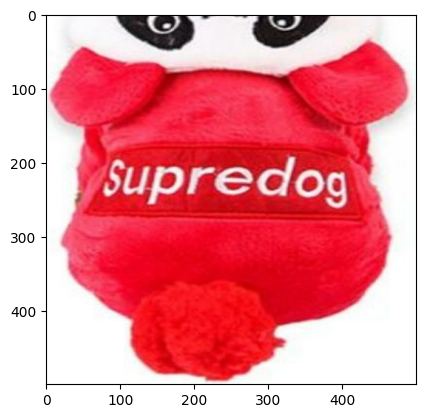

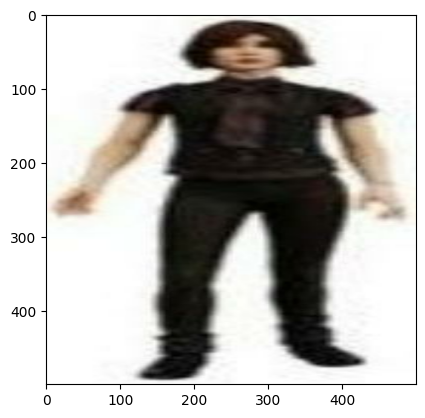

2025-03-08 19:16:42.071904: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Chargement et prétraitement des images
img_size = (500, 500)  # Taille cible
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/train",
    image_size=img_size,
    batch_size=batch_size
)

# Charger une image de train_ds
for images, labels in train_ds.take(1):  # Prendre un lot d'images et de labels
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.show()
    plt.imshow(images[1].numpy().astype("uint8"))
    plt.show()
